<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Raw-Counts" data-toc-modified-id="Raw-Counts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Raw Counts</a></span><ul class="toc-item"><li><span><a href="#Raw-Spore-counts" data-toc-modified-id="Raw-Spore-counts-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Raw Spore counts</a></span></li><li><span><a href="#Raw-cell-counts" data-toc-modified-id="Raw-cell-counts-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Raw cell counts</a></span></li><li><span><a href="#sum-of-raw-spore-and-cell-counts" data-toc-modified-id="sum-of-raw-spore-and-cell-counts-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>sum of raw spore and cell counts</a></span></li><li><span><a href="#Fraction-of-bacteria-in-spore-state" data-toc-modified-id="Fraction-of-bacteria-in-spore-state-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fraction of bacteria in spore state</a></span></li></ul></li><li><span><a href="#Area-normalised-(account-for-longer-samples)" data-toc-modified-id="Area-normalised-(account-for-longer-samples)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Area normalised (account for longer samples)</a></span><ul class="toc-item"><li><span><a href="#cells-(area-normalised)" data-toc-modified-id="cells-(area-normalised)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>cells (area normalised)</a></span></li><li><span><a href="#spores-(area-normalised)" data-toc-modified-id="spores-(area-normalised)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>spores (area normalised)</a></span></li><li><span><a href="#(spores-+-cells)-area-normalised" data-toc-modified-id="(spores-+-cells)-area-normalised-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>(spores + cells) area normalised</a></span></li></ul></li><li><span><a href="#Compare-the-different-views-of-Spore-gradients" data-toc-modified-id="Compare-the-different-views-of-Spore-gradients-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare the different views of Spore gradients</a></span><ul class="toc-item"><li><span><a href="#Fraction-of-bacteria-in-spore-state" data-toc-modified-id="Fraction-of-bacteria-in-spore-state-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fraction of bacteria in spore state</a></span></li><li><span><a href="#area-normalised-number-of-spores-(accounts-for-longer-samples)" data-toc-modified-id="area-normalised-number-of-spores-(accounts-for-longer-samples)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>area normalised number of spores (accounts for longer samples)</a></span></li></ul></li></ul></div>

In Section 2 (Raw counts) we show just exactly how many spores there were at that distance from the top in the biofilm. 
This does not take into account how long a scanned region is. 

In the paper we look at the fraction of cells that have become spores. 

Section 3, we normalise the images by the area, this gives us a more acurate view. 
Since the curves are the same as the ration method but the ratio method is easier to explain, we went with that in the paper. 


In section 4 I just show the final two views of the spores so they can easily be compared. 

In [24]:
%matplotlib inline

In [6]:
import sys 
sys.path += ["/home/nmurphy/Dropbox/work/projects/bf_pulse"]

In [116]:
from lib import filedb
import os.path
import matplotlib.pyplot as plt
import pandas as pd

# Load Data 

In [115]:
base = "/media/nmurphy/BF_Data_Orange/datasets/LSM700_63x_sspb_giant"

file_df = filedb.get_filedb(os.path.join(base, "file_list.tsv"))
all_images = pd.read_csv(os.path.join(base, "spore_cell_individual.tsv"), sep="\t")
## We remove this from the analysis, I dont remember why.  
file_df = file_df[
    ~(
        (file_df["name"] == "JLB077_48hrs_center_1_1")
        & (file_df["dirname"] == "Batch1")
    )
]

In [63]:
delsig_file_df = file_df[file_df["strain"] == "JLB118"]
sigb_file_df = file_df[file_df["strain"] == "JLB077"]
x2qp_file_df = file_df[file_df["strain"] == "JLB117"]


In [94]:
area_norm_cell_counts = 'file_{}_area_norm_cell_counts'
area_norm_spore_counts = 'file_{}_area_norm_spore_counts'
area_norm_total_counts = 'file_{}_area_norm_total_counts'
cell_counts = 'file_{}_cell_counts'
fraction_spores = 'file_{}_fraction_spores'
spore_counts = 'file_{}_spore_counts'
total_counts = 'file_{}_total_counts'

In [66]:
def plot_graph(file_df, data_df, column_pattern, ax):

    for i, batch in enumerate(file_df.dirname.unique()):
        color = plt.cm.Set1(i)
        for fid in file_df.loc[file_df["dirname"]==batch,:].index:
            y = column_pattern.format(fid)
            ax.plot(data_df.distance, all_images[y], color=color)
        ax.plot([0],[1], label=batch, color=color, visible=True )
        ax.legend()
    return ax


# Raw Counts 

## Raw Spore counts 

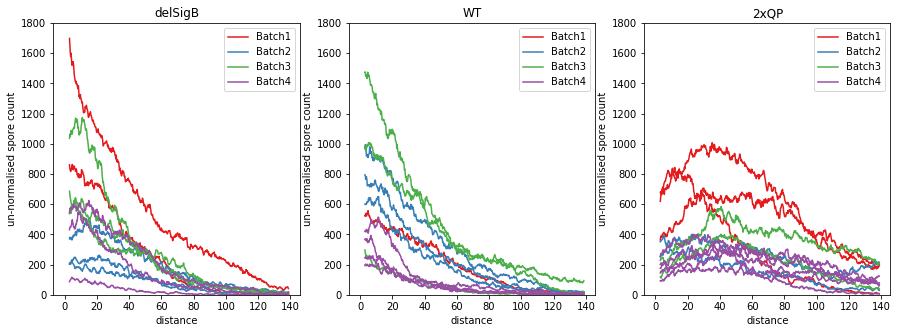

In [76]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, spore_counts,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, spore_counts,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, spore_counts,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 1800)
    a.set_xlabel("distance")
    a.set_ylabel("un-normalised spore count")
    a.set_title(t)

## Raw cell counts 

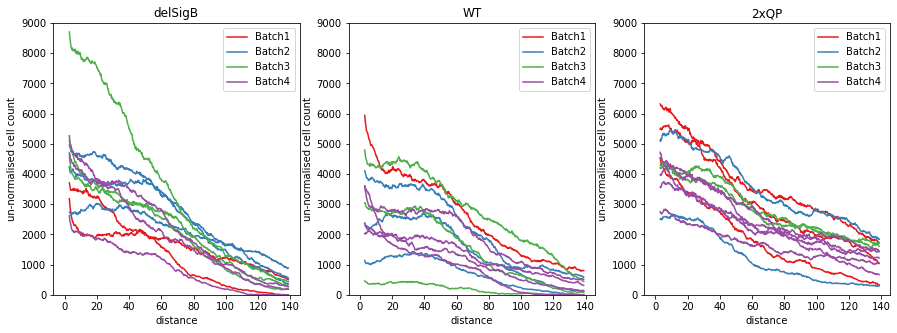

In [85]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, cell_counts,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, cell_counts,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, cell_counts,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 9000)
    a.set_xlabel("distance")
    a.set_ylabel("un-normalised cell count")
    a.set_title(t)

## sum of raw spore and cell counts 

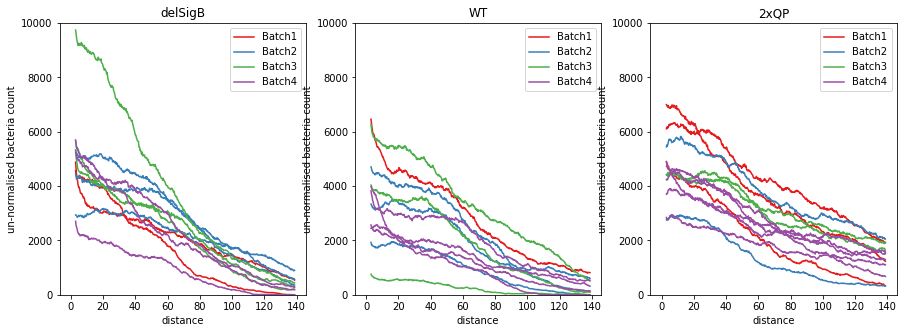

In [93]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, total_counts,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, total_counts,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, total_counts,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 10000)
    a.set_xlabel("distance")
    a.set_ylabel("un-normalised bacteria count")
    a.set_title(t)

## Fraction of bacteria in spore state 

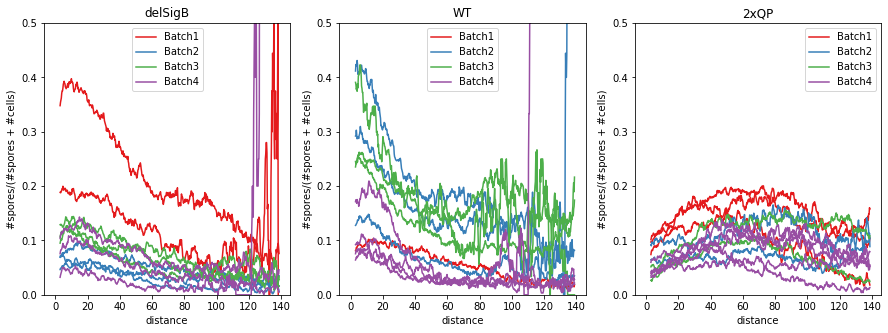

In [89]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, fraction_spores,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, fraction_spores,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, fraction_spores,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 0.5)
    a.set_xlabel("distance")
    a.set_ylabel("#spores/(#spores + #cells)")
    a.set_title(t)

# Area normalised (account for longer samples)

## cells (area normalised)

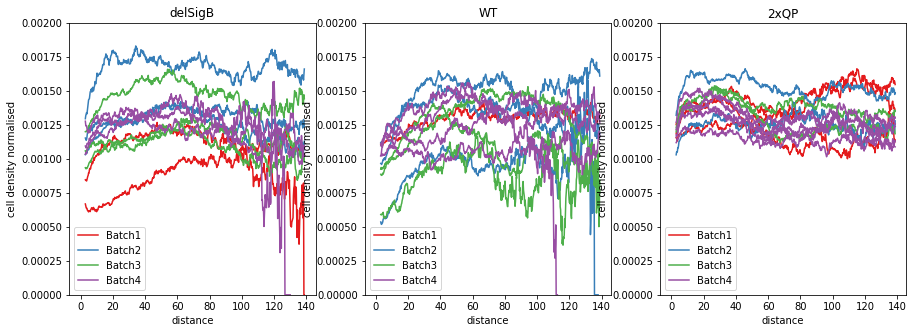

In [100]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, area_norm_cell_counts,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, area_norm_cell_counts,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, area_norm_cell_counts,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 0.002)
    a.set_xlabel("distance")
    a.set_ylabel("cell density normalised")
    a.set_title(t)

## spores (area normalised)

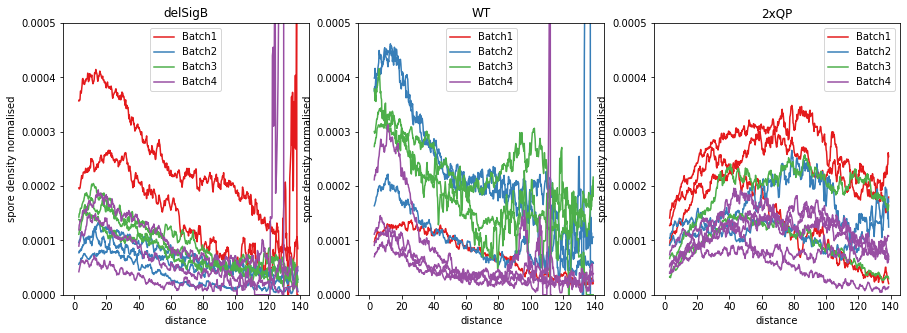

In [109]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, area_norm_spore_counts,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, area_norm_spore_counts,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, area_norm_spore_counts,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 0.0005)
    a.set_xlabel("distance")
    a.set_ylabel("spore density normalised")
    a.set_title(t)

## (spores + cells) area normalised

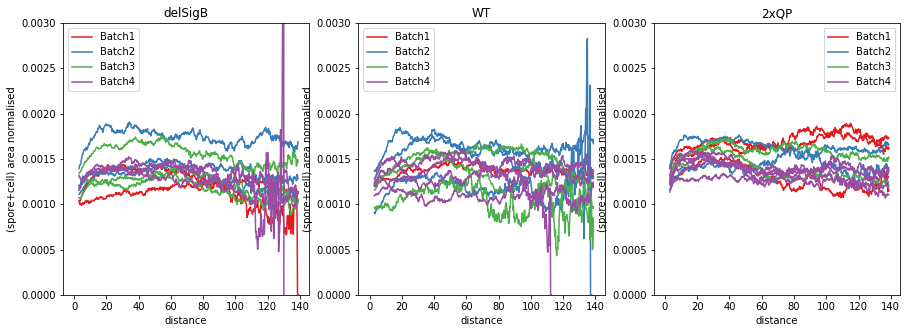

In [108]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, area_norm_total_counts,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, area_norm_total_counts,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, area_norm_total_counts,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 0.003)
    a.set_xlabel("distance")
    a.set_ylabel("(spore+cell) area normalised")
    a.set_title(t)

# Compare the different views of Spore gradients 

## Fraction of bacteria in spore state

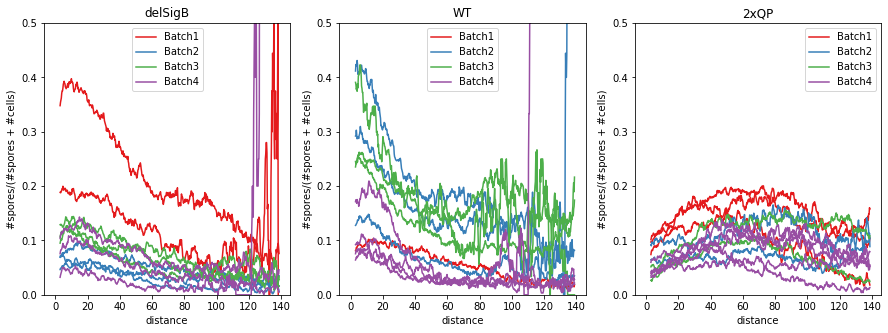

In [112]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, fraction_spores,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, fraction_spores,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, fraction_spores,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 0.5)
    a.set_xlabel("distance")
    a.set_ylabel("#spores/(#spores + #cells)")
    a.set_title(t)

## area normalised number of spores (accounts for longer samples)

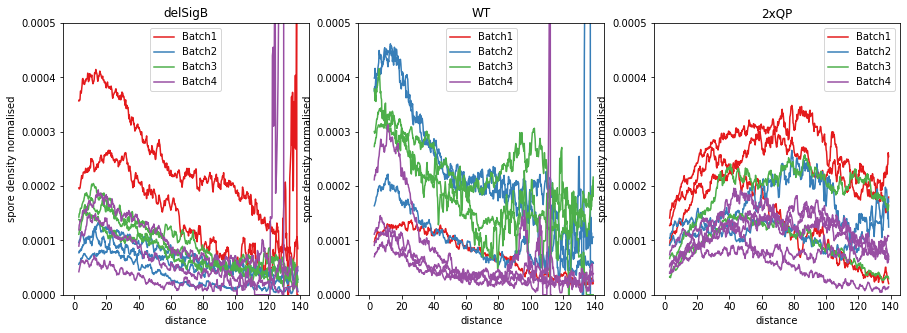

In [113]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0] = plot_graph(delsig_file_df, all_images, area_norm_spore_counts,ax[0])
ax[1] = plot_graph(sigb_file_df, all_images, area_norm_spore_counts,ax[1])
ax[2] = plot_graph(x2qp_file_df, all_images, area_norm_spore_counts,ax[2])
for a, t in zip(ax, ["delSigB", "WT", "2xQP"]):
    a.set_ylim(0, 0.0005)
    a.set_xlabel("distance")
    a.set_ylabel("spore density normalised")
    a.set_title(t)